# Feature Engineering para Precios de Vivienda

### Introducción

En este notebook se implementan las transformaciones identificadas durante el Análisis Exploratorio de Datos (EDA) para preparar los datos para el modelado predictivo. La ingeniería de características (feature engineering) constituye una etapa crítica del proceso donde se realizan las siguientes acciones:

1. **Implementación de estrategias de imputación**: Se aplican los métodos identificados previamente para manejar los valores faltantes en el dataset.

2. **Transformación de variables numéricas**: Se normalizan y transforman las variables cuantitativas según lo determinado en el análisis exploratorio.

3. **Optimización de variables categóricas**: Se procesan las variables cualitativas mediante técnicas de codificación adecuadas para su uso en modelos de machine learning.

4. **Preparación para algoritmos ML**: Se escalan y transforman los datos para cumplir con los requerimientos de los diferentes algoritmos de aprendizaje automático que se implementarán posteriormente.

Este proceso sistemático de transformación busca maximizar la calidad de los datos de entrada para los modelos, preservando al mismo tiempo las relaciones fundamentales entre las variables predictoras y la variable objetivo (`SalePrice`).

# Librerias

In [1]:
import pandas as pd
from utils_EDA import (analizar_columna_num, RMSE_imputaciones)

# Datos

In [2]:
data_train = pd.read_csv('../data/train.csv')
data_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Feacture Engineering

## Eliminación de Variables

> Tras un análisis exhaustivo, se procedió a eliminar aquellas variables que presentaban más del 20% de datos faltantes o distribuciones problemáticas, como categorías extremadamente desbalanceadas (con más del 95% de los registros concentrados en una sola clase) o patrones uniformes sin capacidad predictiva. Esta decisión **basada en principios de parsimonia y calidad estadística** permitió optimizar el conjunto de datos, eliminando ruido y reduciendo la dimensionalidad sin perder información relevante. 

In [3]:
data_train.shape

(1460, 81)

In [4]:
col_a_eliminar = ['Id', 'Alley', 'Utilities', 'Condition2', 'RoofMatl'
                ,'MasVnrType', 'Heating', 'LowQualFinSF', 'KitchenAbvGr'
                ,'3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature'
                ,'MiscVal', 'FireplaceQu']

In [5]:
data_train = data_train.drop(columns=col_a_eliminar)

In [6]:
data_train.shape

(1460, 65)

## Categorización de Variables Numéricas Discretas

> En esta sección, se transforman las variables numéricas discretas (como conteos o clasificaciones ordinales) a tipo categórico, ya que por su naturaleza y valores, son más adecuadas como variables categóricas.

In [7]:
data_train.select_dtypes(include=['object'])

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [8]:
col_a_categorizar = ['MSSubClass', 'OverallQual', 'OverallCond'
                , 'LowQualFinSF','BsmtFullBath','BsmtHalfBath'
                ,'FullBath','HalfBath','BedroomAbvGr'
                ,'KitchenAbvGr','TotRmsAbvGrd','Fireplaces'
                ,'GarageCars','3SsnPorch','ScreenPorch'
                ,'PoolArea','MiscVal','MoSold']

In [9]:
for columna in col_a_categorizar:
    if columna in data_train.columns:
        data_train[columna] = data_train[columna].astype('object')
    else:
        print(f"Advertencia: La columna {columna} no existe en el DataFrame")

Advertencia: La columna LowQualFinSF no existe en el DataFrame
Advertencia: La columna KitchenAbvGr no existe en el DataFrame
Advertencia: La columna 3SsnPorch no existe en el DataFrame
Advertencia: La columna PoolArea no existe en el DataFrame
Advertencia: La columna MiscVal no existe en el DataFrame


In [10]:
data_train.select_dtypes(include=['object'])

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,ScreenPorch,MoSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,2,TA,TA,Y,0,2,WD,Normal
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,Attchd,RFn,2,TA,TA,Y,0,5,WD,Normal
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Attchd,RFn,2,TA,TA,Y,0,9,WD,Normal
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,Detchd,Unf,3,TA,TA,Y,0,2,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,Attchd,RFn,3,TA,TA,Y,0,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,Attchd,RFn,2,TA,TA,Y,0,8,WD,Normal
1456,20,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,...,Attchd,Unf,2,TA,TA,Y,0,2,WD,Normal
1457,70,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,...,Attchd,RFn,1,TA,TA,Y,0,5,WD,Normal
1458,20,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,...,Attchd,Unf,1,TA,TA,Y,0,4,WD,Normal


## Imputación de Valores Faltantes

> En esta sección se procederá a realizar la imputación de los datos faltantes en las variables correspondientes.

In [11]:
col_a_imputar = ['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 
                'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
                'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']

In [12]:
numericas = []
categoricas = []

for col in col_a_imputar:
    if pd.api.types.is_numeric_dtype(data_train[col]):
        numericas.append(col)
    else:
        categoricas.append(col)

print("Variables numéricas:", numericas)
print("Variables categóricas:", categoricas)

Variables numéricas: ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
Variables categóricas: ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'Electrical']


### Variables Numéricas

> Antes de realizar las imputaciones, se procederá a evaluar varios métodos con el fin de comparar su desempeño y seleccionar el más adecuado para cada variable.

#### Variable LotFrontage

In [13]:
data_train['LotFrontage'].isnull().sum(), len(data_train)

(259, 1460)

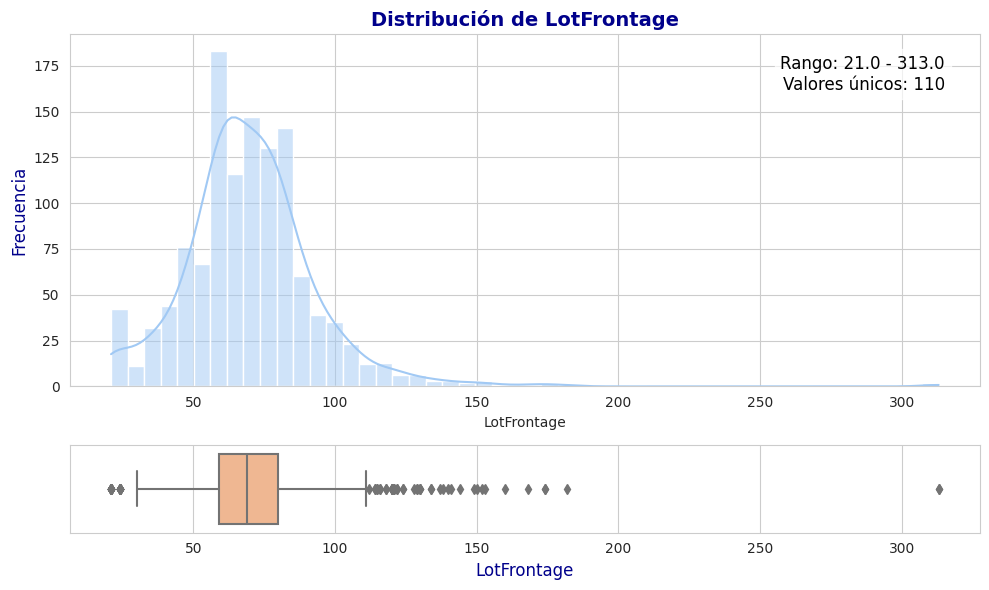

In [14]:
analizar_columna_num('LotFrontage', data_train)

> La variable presenta un **18% de datos faltantes**, sigue una **distribución normal con presencia de outliers**, y muestra **correlaciones moderadas** con otras variables.

**Recomendaciones**:
- **Imputación con mediana (`SimpleImputer`)**: adecuada por la presencia de valores atípicos.
- **Imputación múltiple (`IterativeImputer`, `KNNImputer`)**: recomendada debido a las correlaciones moderadas con otras variables.

In [15]:
RMSE_imputaciones(data_train, 'LotFrontage')

RMSE imputación con Mediana:            21.4596
RMSE imputación con IterativeImputer:   18.2324
RMSE imputación con KNNImputer (k=5): 16.7284


> **se recomienda KNNImputer como el método más adecuado** para imputar los valores faltantes en esta variable.

#### Variable GarageYrBlt

In [16]:
data_train['GarageYrBlt'].isnull().sum(), len(data_train)

(81, 1460)

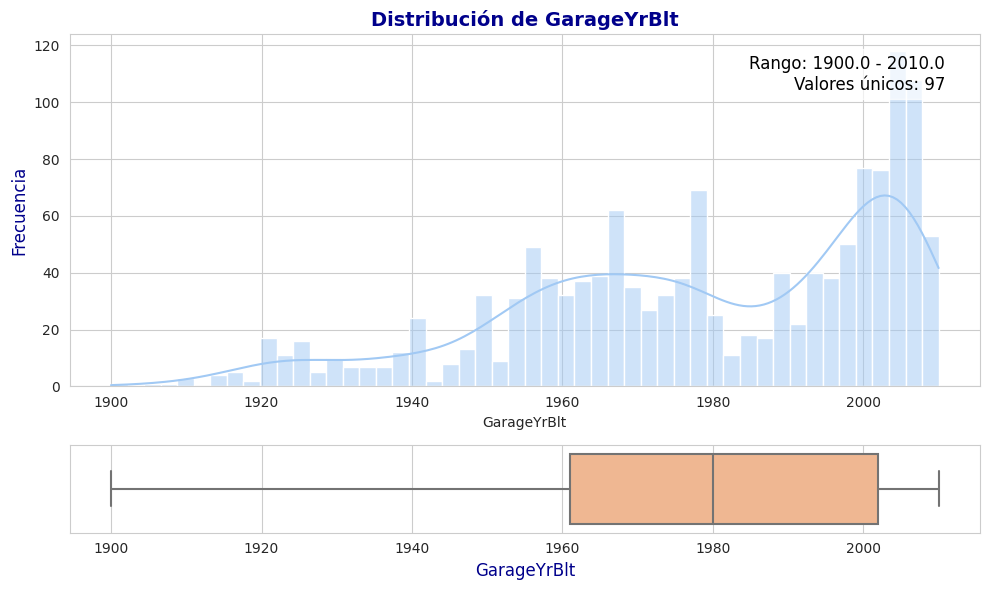

In [17]:
analizar_columna_num('GarageYrBlt', data_train)

> La variable presenta aproximadamente un 6% de datos faltantes, no sigue una distribución normal y muestra una fuerte correlación con la variable `YearBuilt`, la cual no requiere modificaciones. Por lo tanto, **se decide eliminar esta variable para evitar redundancia en la información**.

#### Variable MasVnrArea

In [18]:
data_train['MasVnrArea'].isnull().sum(), len(data_train)

(8, 1460)

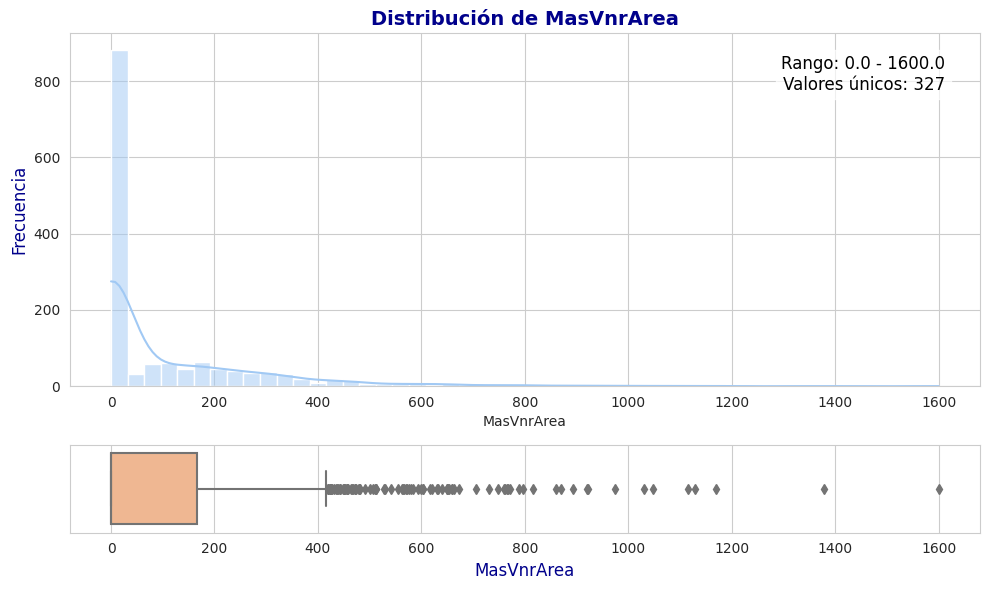

In [19]:
analizar_columna_num('MasVnrArea', data_train)

> La variable presenta aproximadamente un 1% de datos faltantes. Su distribución está **sesgada hacia la derecha**, con un claro pico en los valores bajos que concentra la mayor parte de las observaciones, y presenta múltiples **valores atípicos**. Además, muestra **correlaciones débiles** con otras variables del conjunto de datos.

**Recomendaciones de imputación:**

- **Imputación con la mediana (`SimpleImputer`)**:  
  Es adecuada debido a la presencia de outliers, ya que la mediana es menos sensible a valores extremos que la media, y permite una imputación robusta en distribuciones asimétricas.
  
- **Imputación múltiple (`IterativeImputer`, `KNNImputer`)**:  
  Aunque las correlaciones con otras variables son débiles, estos métodos pueden aprovechar la información disponible para generar estimaciones más precisas que la imputación univariada, especialmente cuando el patrón de faltantes no es completamente aleatorio.


In [20]:
RMSE_imputaciones(data_train, 'MasVnrArea')

RMSE imputación con Mediana:            198.2410
RMSE imputación con IterativeImputer:   167.1480
RMSE imputación con KNNImputer (k=5): 173.6823


> **se recomienda IterativeImputer como el método más adecuado** para imputar los valores faltantes en esta variable.

### Variables Categóricas

### Validación Post-Imputación 

> Verificación de distribuciones pre/post imputación 

por hacer
* variable a eliminar
* categorizacion de las variables
* imputaciones de los datos faltantes
* transformacion de las variables numericas
* reduccion de categorias
* PCA